![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Perspective Transforms**

####**In this lesson we'll learn:**
1. Use OpenCV's getPerspectiveTransform
2. Use findContours to get corners and automate perspective Transform


In [1]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

!unzip -qq images.zip

--2023-05-24 10:35:06--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.198
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  17.1MB/s    in 1.7s    

2023-05-24 10:35:08 (17.1 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    h, w = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()


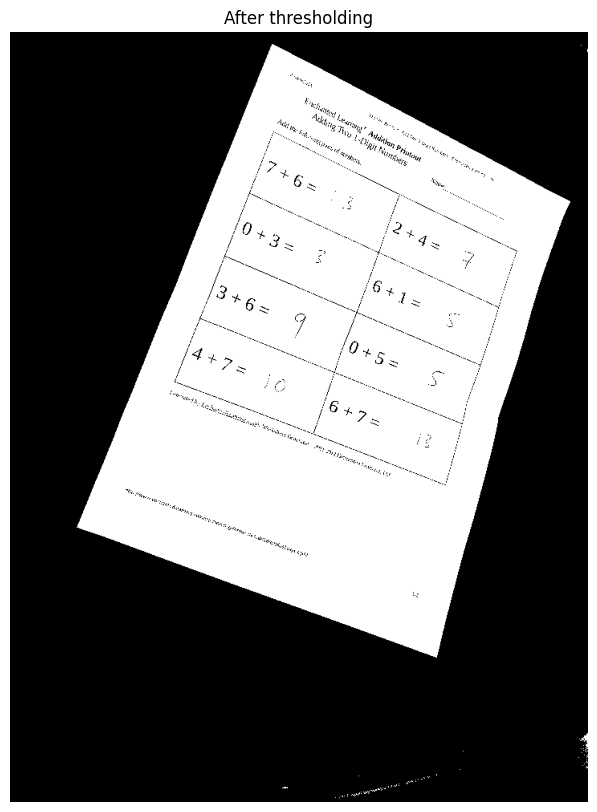

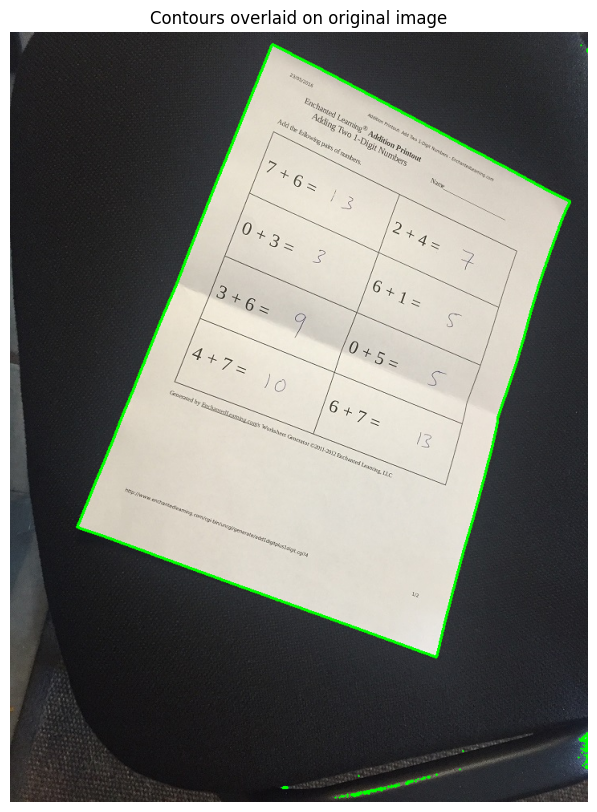

Number of Contours found = 54


In [3]:
image = cv2.imread('images/scan.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

print("Number of Contours found = " + str(len(contours)))

### **Approxiamte our contour above to just 4 points using approxPolyDP**

In [4]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

for cnt in sorted_contours:
	# approximate the contour
	perimeter = cv2.arcLength(cnt, True)
	approx = cv2.approxPolyDP(cnt, 0.05 * perimeter, True)
 
	if len(approx) == 4:
		break

print("Our 4 corner points are:")
print(approx)



Our 4 corner points are:
[[[326  15]]

 [[ 83 617]]

 [[531 779]]

 [[697 211]]]


### **Use getPerspectiveTransform and warpPerspective to create our top down view**

Note: We mannauly matched the order of the points

[[ 9.19445964e-01  3.71138487e-01 -3.05306462e+02]
 [-6.08518156e-01  1.15183794e+00  1.81099350e+02]
 [-2.84063364e-04  1.21835815e-04  1.00000000e+00]]


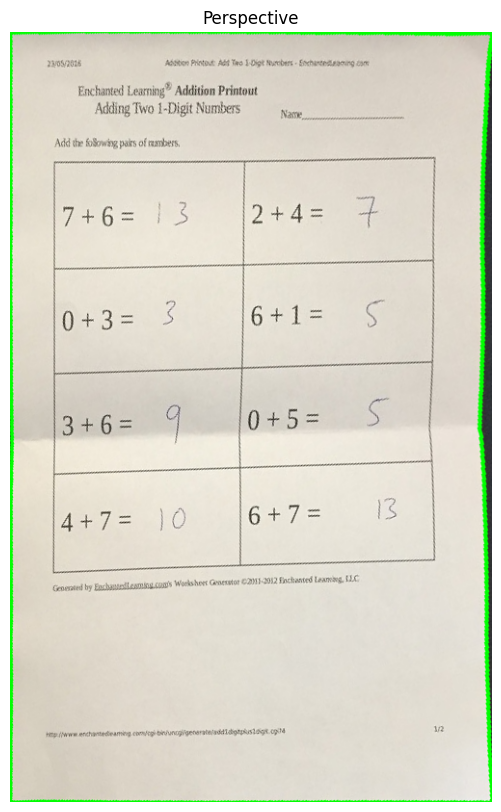

In [5]:
inputPts = np.float32(approx)

outputPts = np.float32([[0,0],
                       [0,800],
                       [500,800],
                       [500,0]])

M = cv2.getPerspectiveTransform(inputPts,outputPts)
print(M)

dst = cv2.warpPerspective(image, M, (500,800))

imshow("Perspective", dst)